# **Menyiapkan Dataset**

In [ ]:
# melakukan download dataset 

!wget --no-check-certificate \
  https://github.com/mawargun/Bangkit-Project/raw/main/BMI.zip \
   -O /tmp/Bangkit-dataset/bmi.zip

--2023-06-03 11:33:12--  https://github.com/mawargun/Bangkit-Project/raw/main/BMI.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mawargun/Bangkit-Project/main/BMI.zip [following]
--2023-06-03 11:33:12--  https://raw.githubusercontent.com/mawargun/Bangkit-Project/main/BMI.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2244 (2.2K) [application/zip]
Saving to: ‘/tmp/Bangkit-dataset/bmi.zip’

/tmp/Bangkit-datase 100%[===================>]   2.19K  --.-KB/s    in 0s      

2023-06-03 11:33:12 (18.1 MB/s) - ‘/tmp/Bangkit-dataset/bmi.zip’ saved [2244/2244]



In [ ]:
#import library yang dibutuhkan
import zipfile
import os

local_zip = '/tmp/Bangkit-dataset/bmi.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')   #read zip file
zip_ref.extractall('/tmp/Bangkit-dataset') #melakukan ekstact zipfile kemudian ditaruh pada directory tmp
zip_ref.close()

In [ ]:
import os

directory = '/tmp/Bangkit-dataset'
files_in_directory = os.listdir(directory)
print(files_in_directory)

['bmi.zip', 'bmi.csv']


In [ ]:
import pandas as pd
import numpy as np

csv_file_path = '/tmp/Bangkit-dataset/bmi.csv' 
data = pd.read_csv(csv_file_path)

In [ ]:
data.dtypes

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object

In [ ]:
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
# Check unique values of "index" column
unique_values = data["Index"].unique()

# Print the unique values
print(unique_values)

[4 2 3 5 1 0]


In [ ]:
bmi_categories = {
    0: 'Extremely weak',
    1: 'Weak',
    2: 'Normal',
    3: 'Overweight',
    4: 'Obesity',
    5: 'Extreme obesity'
}

df = pd.DataFrame(data)
df['status'] = df['Index'].apply(lambda x: bmi_categories[x])
df

,Gender,Height,Weight,Index,status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight
...,...,...,...,...,...
495,Female,150,153,5,Extreme obesity
496,Female,184,121,4,Obesity
497,Female,141,136,5,Extreme obesity
498,Male,150,95,5,Extreme obesity


In [ ]:
df.head(20)

,Gender,Height,Weight,Index,status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight
5,Male,189,104,3,Overweight
6,Male,147,92,5,Extreme obesity
7,Male,154,111,5,Extreme obesity
8,Male,174,90,3,Overweight
9,Female,169,103,4,Obesity


In [ ]:
#menampilkan nilai null dengan bentuk array
np.array(data.isnull().sum())

array([0, 0, 0, 0, 0])

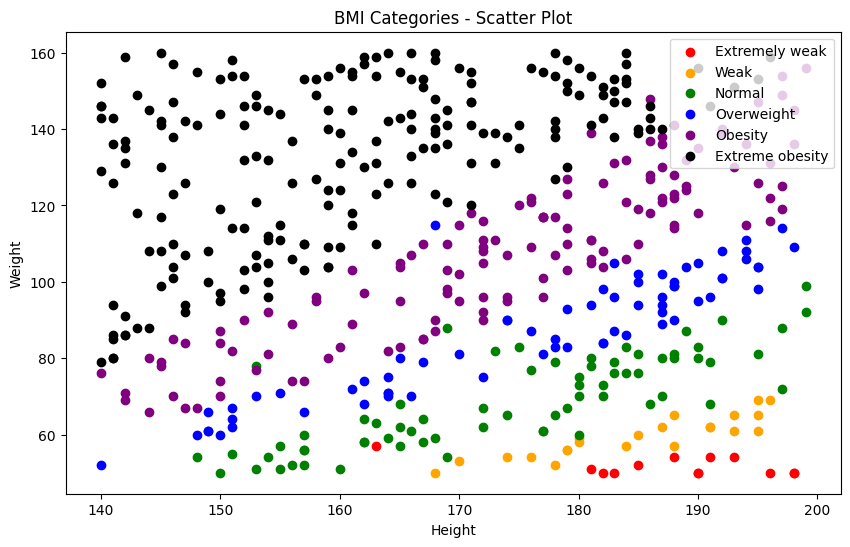

In [ ]:
import matplotlib.pyplot as plt

colors = {
    'Extremely weak': 'red',
    'Weak': 'orange',
    'Normal': 'green',
    'Overweight': 'blue',
    'Obesity': 'purple',
    'Extreme obesity': 'black'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))
for status, color in colors.items():
    subset = df[df['status'] == status]
    plt.scatter(subset['Height'], subset['Weight'], color=color, label=status)

# Set the plot title and labels
plt.title('BMI Categories - Scatter Plot')
plt.xlabel('Height')
plt.ylabel('Weight')

# Add a legend
plt.legend()

# Display the scatter plot
plt.show()

In [ ]:
# Encoding Gender column
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

X = df.drop(['Index', 'status'], axis=1)
y = df['Index']

print("Predictors (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())

Predictors (X):
   Gender  Height  Weight
0       0     174      96
1       0     189      87
2       1     185     110
3       1     195     104
4       0     149      61

Target Variable (y):
0    4
1    2
2    4
3    3
4    3
Name: Index, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123, stratify=y)
print(X_train.shape, y_train.shape)

(400, 3) (400,)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 12)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print(X_train_sm, y_train_sm)
print(X_train_sm.shape, y_train_sm.shape)

[[-1.03046381  1.74351757 -0.23150522]
 [ 0.97043679 -0.25634617  1.16591059]
 [ 0.97043679 -1.34718094 -1.22522313]
 ...
 [-1.03046381  0.48926855 -0.0212583 ]
 [-1.03046381 -1.5160922  -0.77131042]
 [ 0.97043679  1.10048217  0.51898715]] 0      2
1      5
2      4
3      3
4      5
      ..
949    4
950    4
951    4
952    4
953    4
Name: Index, Length: 954, dtype: int64
(954, 3) (954,)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

model_bmi = SVC(probability=True, gamma=0.001, C=1e5, decision_function_shape='ovo')
clf = model_bmi
model_bmi.fit(X_train, y_train)

kf = KFold(shuffle=True, n_splits=8)
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')
print(scores)
print("%0.2f accuracy with std of %0.2f" % (scores.mean(), scores.std()))

[0.92 0.96 0.96 1.   0.92 0.98 0.96 0.9 ]
0.95 accuracy with std of 0.03


In [ ]:
# Calculate and print the accuracy for training data
train_accuracy = model_bmi.score(X_train, y_train)
print("Training Accuracy: %.2f" % train_accuracy)

# Calculate and print the accuracy for testing data
test_accuracy = model_bmi.score(X_test, y_test)
print("Testing Accuracy: %.2f" % test_accuracy)

Training Accuracy: 0.96
Testing Accuracy: 0.94


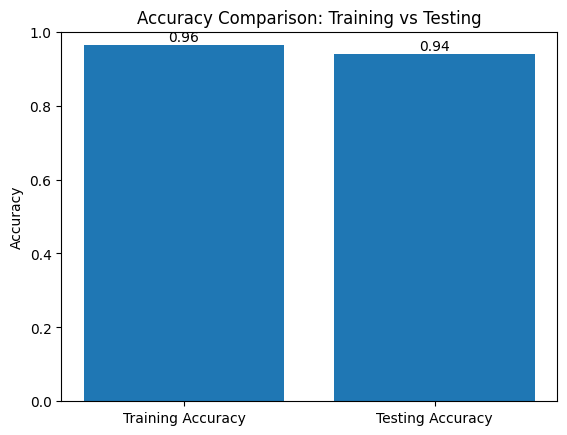

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot
labels = ['Training Accuracy', 'Testing Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.bar(labels, accuracies)
plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Training vs Testing')

# Add text annotations to the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, "%.2f" % v, ha='center')

plt.show()

In [ ]:
Xnew = [[0, 180, 70]]
Xnew = sc.transform(Xnew)
ynew = model_bmi.predict(Xnew)
result = ynew[0]  # Extract the integer value from the array
print(result)

2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Print the current directory path
print("Current Directory:", current_dir)

Current Directory: /content


In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
